# Loan_Prediction_project

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

importing all the nessasary lybraries

In [2]:
df=pd.read_csv("Loan_prediction.csv")
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


loading my model from jupyter notebook and saving it as df

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


there are 13 columns and 614 rows present in the dataset

In [4]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

columns present in the dataset

In [5]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

3 types of data present in the df dataset

In [6]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Gender,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History columns has null values

In [7]:
df['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

489 Males and 112 Females applied for the loan

In [8]:
df['Married'].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

398 people Married and 213 people unmaried

In [9]:
for i in df.columns:
    if df[i].dtypes=='object':
        print('********************','\n',
              i,'\n',
              '********************','\n',
              df[i].value_counts(),'\n')

******************** 
 Loan_ID 
 ******************** 
 LP001002    1
LP002328    1
LP002305    1
LP002308    1
LP002314    1
           ..
LP001692    1
LP001693    1
LP001698    1
LP001699    1
LP002990    1
Name: Loan_ID, Length: 614, dtype: int64 

******************** 
 Gender 
 ******************** 
 Male      489
Female    112
Name: Gender, dtype: int64 

******************** 
 Married 
 ******************** 
 Yes    398
No     213
Name: Married, dtype: int64 

******************** 
 Dependents 
 ******************** 
 0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64 

******************** 
 Education 
 ******************** 
 Graduate        480
Not Graduate    134
Name: Education, dtype: int64 

******************** 
 Self_Employed 
 ******************** 
 No     500
Yes     82
Name: Self_Employed, dtype: int64 

******************** 
 Property_Area 
 ******************** 
 Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int6

the values present that data containing the object type

In [10]:
for i in df.columns:
    if df[i].dtypes=='float':
        print('********************','\n',
              i,'\n',
              '*******************','\n',
              df[i].value_counts(),'\n')

******************** 
 CoapplicantIncome 
 ******************* 
 0.0       273
2500.0      5
2083.0      5
1666.0      5
2250.0      3
         ... 
2791.0      1
1010.0      1
1695.0      1
2598.0      1
240.0       1
Name: CoapplicantIncome, Length: 287, dtype: int64 

******************** 
 LoanAmount 
 ******************* 
 120.0    20
110.0    17
100.0    15
160.0    12
187.0    12
         ..
240.0     1
214.0     1
59.0      1
166.0     1
253.0     1
Name: LoanAmount, Length: 203, dtype: int64 

******************** 
 Loan_Amount_Term 
 ******************* 
 360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64 

******************** 
 Credit_History 
 ******************* 
 1.0    475
0.0     89
Name: Credit_History, dtype: int64 



the values that float datatype present 

In [11]:
for i in df.columns:
    print(df[i].nunique)

<bound method IndexOpsMixin.nunique of 0      LP001002
1      LP001003
2      LP001005
3      LP001006
4      LP001008
         ...   
609    LP002978
610    LP002979
611    LP002983
612    LP002984
613    LP002990
Name: Loan_ID, Length: 614, dtype: object>
<bound method IndexOpsMixin.nunique of 0        Male
1        Male
2        Male
3        Male
4        Male
        ...  
609    Female
610      Male
611      Male
612      Male
613    Female
Name: Gender, Length: 614, dtype: object>
<bound method IndexOpsMixin.nunique of 0       No
1      Yes
2      Yes
3      Yes
4       No
      ... 
609     No
610    Yes
611    Yes
612    Yes
613     No
Name: Married, Length: 614, dtype: object>
<bound method IndexOpsMixin.nunique of 0       0
1       1
2       0
3       0
4       0
       ..
609     0
610    3+
611     1
612     2
613     0
Name: Dependents, Length: 614, dtype: object>
<bound method IndexOpsMixin.nunique of 0          Graduate
1          Graduate
2          Graduate
3      Not

Unique values present in the dataset

In [12]:
df.dropna(axis=0,inplace=True)

dropping the null values containing rows from dataset

In [13]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

Now we can see there is no null values

<AxesSubplot:>

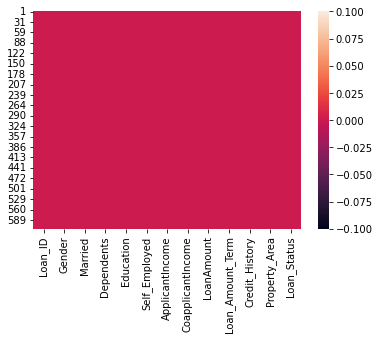

In [14]:
sns.heatmap(df.isnull())

using the heatmap to check the null values 

In [15]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,480.000000,480.000000,480.000000,480.000000,480.000000
mean,5364.231250,1581.093583,144.735417,342.050000,0.854167
std,5668.251251,2617.692267,80.508164,65.212401,0.353307
min,150.000000,0.000000,9.000000,36.000000,0.000000
25%,2898.750000,0.000000,100.000000,360.000000,1.000000
50%,3859.000000,1084.500000,128.000000,360.000000,1.000000
75%,5852.500000,2253.250000,170.000000,360.000000,1.000000
max,81000.000000,33837.000000,600.000000,480.000000,1.000000


# Statistical analysis

* 480 rows present in the dataset
* the mean is greater than the median ,means Right skewed data is present in the dataset
* the Standard deviation is very high all the columns, it means outliers are present we need to clean it
* the difference between the 75Th percentile and 100% percentile is very high..
* Using the Zscore method we need to remove the outliers from the dataset

# Exploratory Data Analysis

<AxesSubplot:xlabel='Gender', ylabel='count'>

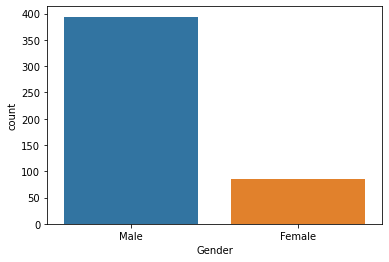

In [16]:
sns.countplot(df['Gender'])

Graphically showing counts of Male and Female

<AxesSubplot:xlabel='Married', ylabel='count'>

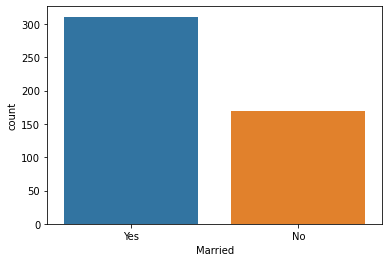

In [17]:
sns.countplot(df['Married'])

Married people applied for loan is more

<AxesSubplot:xlabel='Dependents', ylabel='count'>

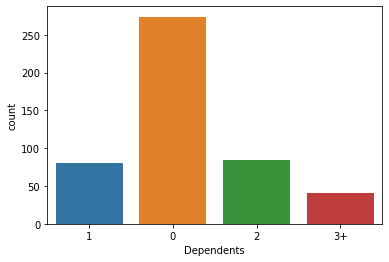

In [18]:
sns.countplot(df['Dependents'])

The poeple who is not having the dependents are applied more for the Loan

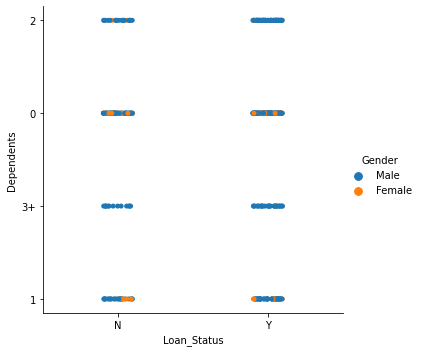

In [19]:
sns.catplot(y='Dependents',x='Loan_Status',hue='Gender',data=df)

females with 0 dependent and 1 dependents only applied and 2 & 3 dependednts there males only applied

<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='LoanAmount'>

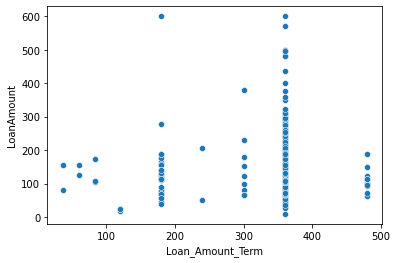

In [20]:
sns.scatterplot(y='LoanAmount',x='Loan_Amount_Term',data=df)

the People taken more loan are taken long term

<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='Count'>

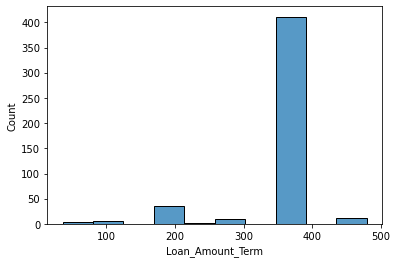

In [21]:
sns.histplot(x='Loan_Amount_Term',data=df)

Mejority of people are taken long term 

<AxesSubplot:xlabel='Loan_Status', ylabel='ApplicantIncome'>

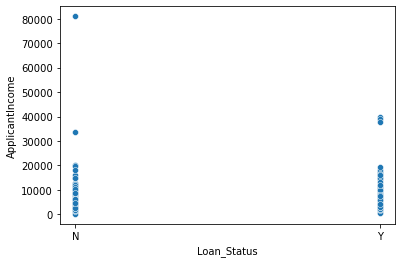

In [22]:
sns.scatterplot(y='ApplicantIncome',x='Loan_Status',data=df)

the poeple with low income are applied for loan and got the loan

<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

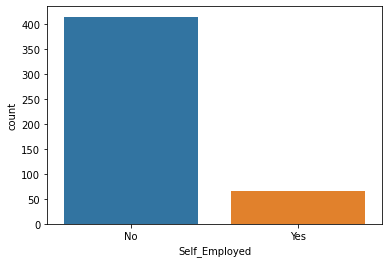

In [23]:
sns.countplot(df['Self_Employed'])

people worked in corporate company are applied more for the Loan

<AxesSubplot:xlabel='Property_Area', ylabel='count'>

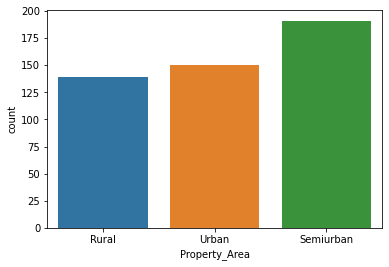

In [24]:
sns.countplot(df['Property_Area'])

Semiurban people applied more for Loan

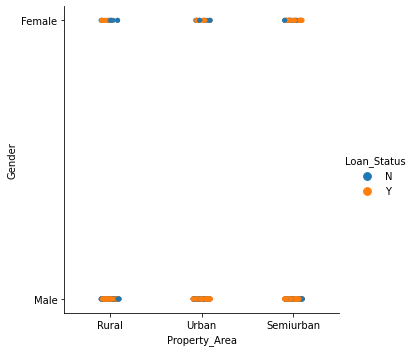

In [25]:
sns.catplot(x='Property_Area',y='Gender',hue='Loan_Status',data=df)

urban people are got more loan compared to Rural and semiurban

<AxesSubplot:xlabel='ApplicantIncome', ylabel='CoapplicantIncome'>

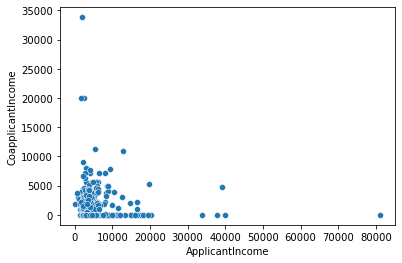

In [26]:
sns.scatterplot(x='ApplicantIncome',y='CoapplicantIncome',data=df)

Applicants income is more compared to coapplicantIncome

<AxesSubplot:xlabel='Credit_History', ylabel='count'>

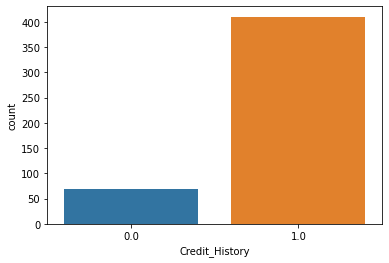

In [27]:
sns.countplot(df['Credit_History'])

<AxesSubplot:xlabel='Education', ylabel='count'>

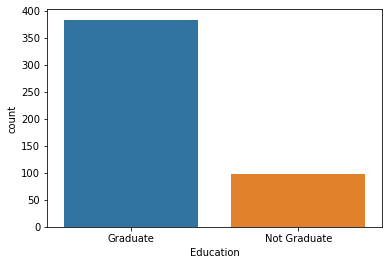

In [28]:
sns.countplot(df['Education'])

Graduate people applied more for the Loan

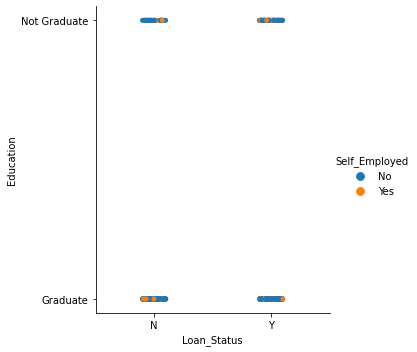

In [29]:
sns.catplot(x='Loan_Status',y='Education',hue='Self_Employed',data=df)

Graduate people with working in the corporate company are got Loan more compared to others

In [30]:
from sklearn.preprocessing import OrdinalEncoder
oe=OrdinalEncoder()

for i in df.columns:
    if df[i].dtypes=='object':
        df[i]=oe.fit_transform(df[i].values.reshape(-1,1))
        
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,0.0,1.0,1.0,1.0,0.0,0.0,4583,1508.0,128.0,360.0,1.0,0.0,0.0
2,1.0,1.0,1.0,0.0,0.0,1.0,3000,0.0,66.0,360.0,1.0,2.0,1.0
3,2.0,1.0,1.0,0.0,1.0,0.0,2583,2358.0,120.0,360.0,1.0,2.0,1.0
4,3.0,1.0,0.0,0.0,0.0,0.0,6000,0.0,141.0,360.0,1.0,2.0,1.0
5,4.0,1.0,1.0,2.0,0.0,1.0,5417,4196.0,267.0,360.0,1.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,475.0,0.0,0.0,0.0,0.0,0.0,2900,0.0,71.0,360.0,1.0,0.0,1.0
610,476.0,1.0,1.0,3.0,0.0,0.0,4106,0.0,40.0,180.0,1.0,0.0,1.0
611,477.0,1.0,1.0,1.0,0.0,0.0,8072,240.0,253.0,360.0,1.0,2.0,1.0
612,478.0,1.0,1.0,2.0,0.0,0.0,7583,0.0,187.0,360.0,1.0,2.0,1.0


Converting the object data into Numarical data with the help of OrdinalEncoder

In [31]:
from scipy.stats import zscore
z=np.abs(zscore(df))
z

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,1.728446,0.467198,0.737162,0.218599,0.503253,0.399275,0.137970,0.027952,0.208089,0.275542,0.413197,1.318868,1.497746
2,1.721229,0.467198,0.737162,0.762033,0.503253,2.504541,0.417536,0.604633,0.979001,0.275542,0.413197,1.259774,0.667670
3,1.714012,0.467198,0.737162,0.762033,1.987072,0.399275,0.491180,0.297100,0.307562,0.275542,0.413197,1.259774,0.667670
4,1.706795,0.467198,1.356553,0.762033,0.503253,0.399275,0.112280,0.604633,0.046446,0.275542,0.413197,1.259774,0.667670
5,1.699579,0.467198,0.737162,1.199231,0.503253,2.504541,0.009319,0.999978,1.520245,0.275542,0.413197,1.259774,0.667670
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,1.699579,2.140419,1.356553,0.762033,0.503253,0.399275,0.435196,0.604633,0.916831,0.275542,0.413197,1.318868,0.667670
610,1.706795,0.467198,0.737162,2.179863,0.503253,0.399275,0.222210,0.604633,1.302286,2.487549,0.413197,1.318868,0.667670
611,1.714012,0.467198,0.737162,0.218599,0.503253,0.399275,0.478206,0.512854,1.346168,0.275542,0.413197,1.259774,0.667670
612,1.721229,0.467198,0.737162,1.199231,0.503253,0.399275,0.391846,0.604633,0.525520,0.275542,0.413197,1.259774,0.667670


Using Zscore method to Remove the outliers 

In [32]:
threshod=3
print(np.where(z>3))

(array([  8,  12,  54,  75,  98, 120, 120, 137, 137, 142, 144, 187, 205,
       220, 244, 286, 312, 319, 326, 347, 380, 386, 409, 410, 426, 438,
       450, 454, 457, 471], dtype=int64), array([7, 9, 9, 9, 9, 6, 8, 7, 8, 6, 6, 9, 9, 8, 8, 8, 7, 6, 7, 6, 8, 9,
       8, 8, 9, 8, 9, 7, 9, 8], dtype=int64))


setting threshod to 3 , because 99.9% of the data is located in the range of 3 standard deviations

In [33]:
print(z.iloc[8][7])
print(z.iloc[220][8])

3.589688470140909
3.621601134207327


we can see where the zscore is more than 3,we need to remove

In [34]:
df1=df[(z<3).all(axis=1)]

removing the outliers and saving the data into new variable df1

In [35]:
df1

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,0.0,1.0,1.0,1.0,0.0,0.0,4583,1508.0,128.0,360.0,1.0,0.0,0.0
2,1.0,1.0,1.0,0.0,0.0,1.0,3000,0.0,66.0,360.0,1.0,2.0,1.0
3,2.0,1.0,1.0,0.0,1.0,0.0,2583,2358.0,120.0,360.0,1.0,2.0,1.0
4,3.0,1.0,0.0,0.0,0.0,0.0,6000,0.0,141.0,360.0,1.0,2.0,1.0
5,4.0,1.0,1.0,2.0,0.0,1.0,5417,4196.0,267.0,360.0,1.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,475.0,0.0,0.0,0.0,0.0,0.0,2900,0.0,71.0,360.0,1.0,0.0,1.0
610,476.0,1.0,1.0,3.0,0.0,0.0,4106,0.0,40.0,180.0,1.0,0.0,1.0
611,477.0,1.0,1.0,1.0,0.0,0.0,8072,240.0,253.0,360.0,1.0,2.0,1.0
612,478.0,1.0,1.0,2.0,0.0,0.0,7583,0.0,187.0,360.0,1.0,2.0,1.0


<AxesSubplot:>

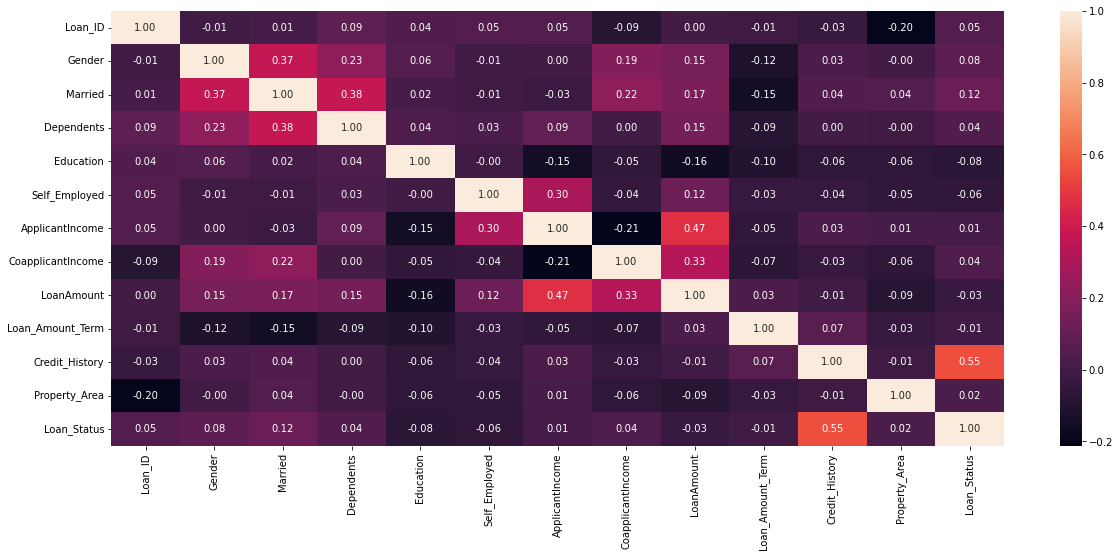

In [36]:
plt.figure(figsize=(20,8))
sns.heatmap(data=df1.corr(),annot=True,fmt='0.2f')

checing for the Coreletion of df1 

In [37]:
x=df1.iloc[:,:-1]
x

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
1,0.0,1.0,1.0,1.0,0.0,0.0,4583,1508.0,128.0,360.0,1.0,0.0
2,1.0,1.0,1.0,0.0,0.0,1.0,3000,0.0,66.0,360.0,1.0,2.0
3,2.0,1.0,1.0,0.0,1.0,0.0,2583,2358.0,120.0,360.0,1.0,2.0
4,3.0,1.0,0.0,0.0,0.0,0.0,6000,0.0,141.0,360.0,1.0,2.0
5,4.0,1.0,1.0,2.0,0.0,1.0,5417,4196.0,267.0,360.0,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...
609,475.0,0.0,0.0,0.0,0.0,0.0,2900,0.0,71.0,360.0,1.0,0.0
610,476.0,1.0,1.0,3.0,0.0,0.0,4106,0.0,40.0,180.0,1.0,0.0
611,477.0,1.0,1.0,1.0,0.0,0.0,8072,240.0,253.0,360.0,1.0,2.0
612,478.0,1.0,1.0,2.0,0.0,0.0,7583,0.0,187.0,360.0,1.0,2.0


Seperating independent variables and naming x

In [38]:
y=df1.iloc[:,-1]
y

1      0.0
2      1.0
3      1.0
4      1.0
5      1.0
      ... 
609    1.0
610    1.0
611    1.0
612    1.0
613    0.0
Name: Loan_Status, Length: 452, dtype: float64

Saving the Dependent variable as y

In [39]:
df1.skew()

Loan_ID              0.011882
Gender              -1.658936
Married             -0.602600
Dependents           0.973964
Education            1.443921
Self_Employed        2.200742
ApplicantIncome      1.980989
CoapplicantIncome    1.405169
LoanAmount           1.064924
Loan_Amount_Term    -2.010659
Credit_History      -1.986572
Property_Area       -0.038700
Loan_Status         -0.871173
dtype: float64

checking the skewness of the df1 dataset,some of the columns has skewness having more than aceptance range

In [40]:
df1=np.cbrt(df1)

In [41]:
df1.skew()

Loan_ID             -0.894936
Gender              -1.658936
Married             -0.602600
Dependents           0.440002
Education            1.443921
Self_Employed        2.200742
ApplicantIncome      0.855274
CoapplicantIncome   -0.001604
LoanAmount          -0.003970
Loan_Amount_Term    -2.472505
Credit_History      -1.986572
Property_Area       -0.762389
Loan_Status         -0.871173
dtype: float64

we see now the skewness has came reduced using cuberoot method

In [42]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

x=pd.DataFrame(sc.fit_transform(x),columns=x.columns)
x

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,-1.725029,0.470767,0.743818,0.239878,-0.512416,-0.387463,-0.059916,0.062631,-0.147447,0.232882,0.417164,-1.308556
1,-1.717772,0.470767,0.743818,-0.745801,-0.512416,2.580895,-0.586262,-0.842995,-1.201543,0.232882,0.417164,1.251909
2,-1.710515,0.470767,0.743818,-0.745801,1.951541,-0.387463,-0.724915,0.573097,-0.283459,0.232882,0.417164,1.251909
3,-1.703258,0.470767,-1.344416,-0.745801,-0.512416,-0.387463,0.411235,-0.842995,0.073573,0.232882,0.417164,1.251909
4,-1.696001,0.470767,0.743818,1.225556,-0.512416,2.580895,0.217388,1.676903,2.215768,0.232882,0.417164,1.251909
...,...,...,...,...,...,...,...,...,...,...,...,...
447,1.722043,-2.124193,-1.344416,-0.745801,-0.512416,-0.387463,-0.619512,-0.842995,-1.116535,0.232882,0.417164,-1.308556
448,1.729300,0.470767,0.743818,2.211235,-0.512416,-0.387463,-0.218518,-0.842995,-1.643583,-3.126560,0.417164,-1.308556
449,1.736557,0.470767,0.743818,0.239878,-0.512416,-0.387463,1.100174,-0.698863,1.977746,0.232882,0.417164,1.251909
450,1.743814,0.470767,0.743818,1.225556,-0.512416,-0.387463,0.937582,-0.842995,0.855644,0.232882,0.417164,1.251909


using the Standard Scaler to standardise the values with Mean zero and Standard deviation -1 to +1

In [43]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

to check the corelation of the columns we are using VIF 

In [44]:
vif=pd.DataFrame()
vif['VIF Values']=[variance_inflation_factor(df1.values,i)
                  for i in range(len(df1.columns))]
vif['VIF Features']=df1.columns
vif

,VIF Values,VIF Features
0,15.997902,Loan_ID
1,6.650878,Gender
2,4.107726,Married
3,2.115849,Dependents
4,1.303931,Education
5,1.257213,Self_Employed
6,53.591667,ApplicantIncome
7,3.461565,CoapplicantIncome
8,84.028640,LoanAmount
9,70.046024,Loan_Amount_Term


the VIF values are in range , ideal range is 10 , all the columns are in range 

In [45]:
from imblearn.over_sampling import SMOTE
sm=SMOTE()

x,y=sm.fit_resample(x,y)

using the SMOTE function to resample the x and y values 

In [46]:
y.value_counts()

0.0    316
1.0    316
Name: Loan_Status, dtype: int64

y values are equal prediction

# Modelling

In [47]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

Importing the Nessesary models for the prediction and train,test,splitand scoring parameters 

In [48]:
maxAccu=0
maxRs=0

for i in range(1,500):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=i)
    dtc=DecisionTreeClassifier()
    dtc.fit(x_train,y_train)
    pred=dtc.predict(x_test)
    accu=accuracy_score(y_test,pred)
    if accu>maxAccu:
        maxAccu=accu
        maxRs=i
print('Best accuracy score is ',maxAccu,'at the Random State of',maxRs)

Best accuracy score is  0.8421052631578947 at the Random State of 148


Checking for best Random state to work the model with best accuracy 

In [49]:
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier,BaggingClassifier
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier

importing other models also for modeling 

In [50]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=maxRs)

separating the train and test model with best Random state

In [51]:
print('Support Vector')
svc=SVC()
svc.fit(x_train,y_train)
predsvc=svc.predict(x_test)
predsvc_train=svc.predict(x_train)
print('Accuracy score on test data',accuracy_score(y_test,predsvc)*100)
print('Accuracy score on train data',accuracy_score(y_train,predsvc_train)*100)
print('Classification report','\n',classification_report(y_test,predsvc))
print('Confusion matrix','\n',confusion_matrix(y_test,predsvc))

Support Vector
Accuracy score on test data 81.05263157894737
Accuracy score on train data 80.09049773755656
Classification report 
               precision    recall  f1-score   support

         0.0       0.91      0.68      0.78        94
         1.0       0.75      0.94      0.83        96

    accuracy                           0.81       190
   macro avg       0.83      0.81      0.81       190
weighted avg       0.83      0.81      0.81       190

Confusion matrix 
 [[64 30]
 [ 6 90]]


Supporvector model is has 100% accuracy score

In [52]:
print('DecisionTreeClassifier')
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
preddtr=dtc.predict(x_test)
preddtr_train=dtc.predict(x_train)
print('Accuracy score on test data',accuracy_score(y_test,preddtr)*100)
print('Accuracy score on train data',accuracy_score(y_train,preddtr_train)*100)
print('Classification report','\n',classification_report(y_test,preddtr))
print('Confusion matrix','\n',confusion_matrix(y_test,preddtr))

DecisionTreeClassifier
Accuracy score on test data 84.21052631578947
Accuracy score on train data 100.0
Classification report 
               precision    recall  f1-score   support

         0.0       0.82      0.87      0.85        94
         1.0       0.87      0.81      0.84        96

    accuracy                           0.84       190
   macro avg       0.84      0.84      0.84       190
weighted avg       0.84      0.84      0.84       190

Confusion matrix 
 [[82 12]
 [18 78]]


DecisionTreeclassifier also performing well

In [53]:
print('GradientBoostingClassifier')
gb=GradientBoostingClassifier()
gb.fit(x_train,y_train)
predgb=gb.predict(x_test)
predgb_train=gb.predict(x_train)
print('Accuracy score on test data',accuracy_score(y_test,predgb)*100)
print('Accuracy score on train data',accuracy_score(y_train,predgb_train)*100)
print('Classification report','\n',classification_report(y_test,predgb))
print('Confusion matrix','\n',confusion_matrix(y_test,predgb))

GradientBoostingClassifier
Accuracy score on test data 85.78947368421052
Accuracy score on train data 95.47511312217195
Classification report 
               precision    recall  f1-score   support

         0.0       0.89      0.82      0.85        94
         1.0       0.83      0.90      0.86        96

    accuracy                           0.86       190
   macro avg       0.86      0.86      0.86       190
weighted avg       0.86      0.86      0.86       190

Confusion matrix 
 [[77 17]
 [10 86]]


GradientBoosting also performing well

In [54]:
print('AdaBoostClassifier')
ab=AdaBoostClassifier()
ab.fit(x_train,y_train)
predab=ab.predict(x_test)
predab_train=gb.predict(x_train)
print('Accuracy score on test data',accuracy_score(y_test,predab)*100)
print('Accuracy score on train data',accuracy_score(y_train,predab_train)*100)
print('Classification report',classification_report(y_test,predab))
print('Confusion matrix',confusion_matrix(y_test,predab))

AdaBoostClassifier
Accuracy score on test data 81.05263157894737
Accuracy score on train data 95.47511312217195
Classification report               precision    recall  f1-score   support

         0.0       0.82      0.79      0.80        94
         1.0       0.80      0.83      0.82        96

    accuracy                           0.81       190
   macro avg       0.81      0.81      0.81       190
weighted avg       0.81      0.81      0.81       190

Confusion matrix [[74 20]
 [16 80]]


AdaBoostClassifier also performing well

In [55]:
print('BaggingClassifier')
bg=BaggingClassifier()
bg.fit(x_train,y_train)
predbg=bg.predict(x_test)
predbg_train=bg.predict(x_train)
print('Accuracy score on test data',accuracy_score(y_test,predbg)*100)
print('Accuracy score on train data',accuracy_score(y_train,predbg_train)*100)
print('Classification report',classification_report(y_test,predbg))
print('Confusion matrix',confusion_matrix(y_test,predbg))

BaggingClassifier
Accuracy score on test data 85.26315789473684
Accuracy score on train data 98.64253393665159
Classification report               precision    recall  f1-score   support

         0.0       0.84      0.87      0.85        94
         1.0       0.87      0.83      0.85        96

    accuracy                           0.85       190
   macro avg       0.85      0.85      0.85       190
weighted avg       0.85      0.85      0.85       190

Confusion matrix [[82 12]
 [16 80]]


BaggingClassifier also has 100% accuracy

In [56]:
print('RandomForestClassifier')
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
predrf_train=rf.predict(x_train)
print('Accuracy score on test data',accuracy_score(y_test,predrf)*100)
print('Accuracy score on train data',accuracy_score(y_train,predrf_train)*100)
print('Classification report',classification_report(y_test,predrf))
print('Confusion matrix',confusion_matrix(y_test,predrf))

RandomForestClassifier
Accuracy score on test data 91.05263157894737
Accuracy score on train data 100.0
Classification report               precision    recall  f1-score   support

         0.0       0.94      0.87      0.91        94
         1.0       0.88      0.95      0.91        96

    accuracy                           0.91       190
   macro avg       0.91      0.91      0.91       190
weighted avg       0.91      0.91      0.91       190

Confusion matrix [[82 12]
 [ 5 91]]


RandomForestClassifier also has 100% accuracy score

In [57]:
print('ExtraTreesClassifier')
et=ExtraTreesClassifier()
et.fit(x_train,y_train)
predet=et.predict(x_test)
predet_train=et.predict(x_train)
print('Accuracy score on test data',accuracy_score(y_test,predet)*100)
print('Accuracy score on train data',accuracy_score(y_train,predet_train)*100)
print('Classification report',classification_report(y_test,predet))
print('Confusion matrix',confusion_matrix(y_test,predet))

ExtraTreesClassifier
Accuracy score on test data 93.15789473684211
Accuracy score on train data 100.0
Classification report               precision    recall  f1-score   support

         0.0       0.95      0.91      0.93        94
         1.0       0.92      0.95      0.93        96

    accuracy                           0.93       190
   macro avg       0.93      0.93      0.93       190
weighted avg       0.93      0.93      0.93       190

Confusion matrix [[86  8]
 [ 5 91]]


with ExtraTreesClassifier also getting 100% accuracy

In [58]:
from sklearn.model_selection import cross_val_score

In [59]:
print('GradientBoostClassifier')
scoregb=cross_val_score(gb,x,y,cv=10)
print(scoregb*100)
print('Mean score',scoregb.mean()*100)

GradientBoostClassifier
[48.4375     57.8125     31.74603175 60.31746032 77.77777778 80.95238095
 82.53968254 84.12698413 71.42857143 49.20634921]
Mean score 64.4345238095238


In [60]:
print('AdaBoostClassifer')
scoreab=cross_val_score(ab,x,y,cv=10)
print(scoreab*100)
print('Mean score',scoreab.mean()*100)

AdaBoostClassifer
[43.75       51.5625     34.92063492 61.9047619  71.42857143 68.25396825
 84.12698413 79.36507937 55.55555556 41.26984127]
Mean score 59.213789682539684


In [61]:
print('ExtraTreesClassifier')
scoreet=cross_val_score(et,x,y,cv=10)
print(scoreet*100)
print('Mean score',scoreet.mean()*100)

ExtraTreesClassifier
[81.25       73.4375     74.6031746  77.77777778 87.3015873  93.65079365
 95.23809524 87.3015873  93.65079365 92.06349206]
Mean score 85.62748015873017


In [62]:
print('BaggingClassifier')
scorebg=cross_val_score(bg,x,y,cv=10)
print(scorebg*100)
print('Mean score',scorebg.mean()*100)

BaggingClassifier
[48.4375     48.4375     34.92063492 66.66666667 80.95238095 73.01587302
 74.6031746  76.19047619 82.53968254 61.9047619 ]
Mean score 64.76686507936508


In [63]:
print('DecisionTreeClassifier')
scoredtc=cross_val_score(dtc,x,y,cv=10)
print(scoredtc*100)
print('Mean score',scoredtc.mean()*100)

DecisionTreeClassifier
[46.875      43.75       31.74603175 47.61904762 76.19047619 84.12698413
 73.01587302 85.71428571 82.53968254 52.38095238]
Mean score 62.39583333333333


In [64]:
print('Support vector')
scoresvc=cross_val_score(svc,x,y,cv=10)
print(scoresvc*100)
print('Mean score',scoresvc.mean()*100)

Support vector
[71.875      73.4375     71.42857143 71.42857143 71.42857143 73.01587302
 69.84126984 71.42857143 76.19047619 77.77777778]
Mean score 72.78521825396825


 accuracy scoreis better with ExtraTreesClassifier

In [66]:
from sklearn.model_selection import GridSearchCV

with the help of Gridsearchcv finding for the best parameters

In [67]:
parameters={'criterion':['gini','entropy'],
           'random_state':[100,500,1000,1500],
           'max_depth':[10,50,100],
           'n_jobs':[-2,-1,1],
           'n_estimators':[50,100,150,200]}

In [68]:
gscv=GridSearchCV(ExtraTreesClassifier(),parameters,cv=5)
gscv.fit(x_train,y_train)
gscv.best_params_

{'criterion': 'gini',
 'max_depth': 50,
 'n_estimators': 50,
 'n_jobs': -2,
 'random_state': 100}

performing the model for best parameters

In [69]:
model=ExtraTreesClassifier(criterion='gini',max_depth=50,n_estimators=50,n_jobs=-2,random_state=100)

building the best model with best parameters

In [70]:
model.fit(x_train,y_train)
pred=model.predict(x_test)
print('Best Accuracy score',accuracy_score(y_test,pred)*100)

Best Accuracy score 93.15789473684211


training and testing the model with best parameters

In [71]:
import pickle
file='Loan_prediction'
pickle.dump(model,open(file,'wb'))

using Pickle lybrari to save the model

In [72]:
final_model=pickle.load(open('Loan_prediction','rb'))
final_model.score(x_test,y_test)*100

93.15789473684211

loading the saved model from my jupyter notebook